In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pytraj as pt
import pandas as pd
import seaborn as sns

In [4]:
traj_dir='//Users/mingyu/analysis/COX-2_empty/'
traj = pt.iterload('*rep3_strip.nc', '1_strip.parm7',stride=1)
pt.superpose(traj, ref=0)
rmsf_list=pt.rmsf(traj[int(len(traj)*0.75):] ,mask='byres')   
print (len(rmsf_list))
Dimer_1=rmsf_list[0:553]
print(len(Dimer_1))
print (Dimer_1)
Dimer_2= rmsf_list[553:]
print(len(Dimer_2))
print (Dimer_2)
rmsf_stack=np.vstack((Dimer_1.T[1],Dimer_2.T[1]))
print (rmsf_stack)

1106
553
[[  1.           1.73025741]
 [  2.           1.28924341]
 [  3.           0.97430472]
 ...
 [551.           1.32106102]
 [552.           0.91296601]
 [553.           0.60584114]]
553
[[5.54000000e+02 1.53453727e+00]
 [5.55000000e+02 1.22549285e+00]
 [5.56000000e+02 1.00406486e+00]
 ...
 [1.10400000e+03 1.53710820e+00]
 [1.10500000e+03 9.33837656e-01]
 [1.10600000e+03 6.20023992e-01]]
[[1.73025741 1.28924341 0.97430472 ... 1.32106102 0.91296601 0.60584114]
 [1.53453727 1.22549285 1.00406486 ... 1.5371082  0.93383766 0.62002399]]


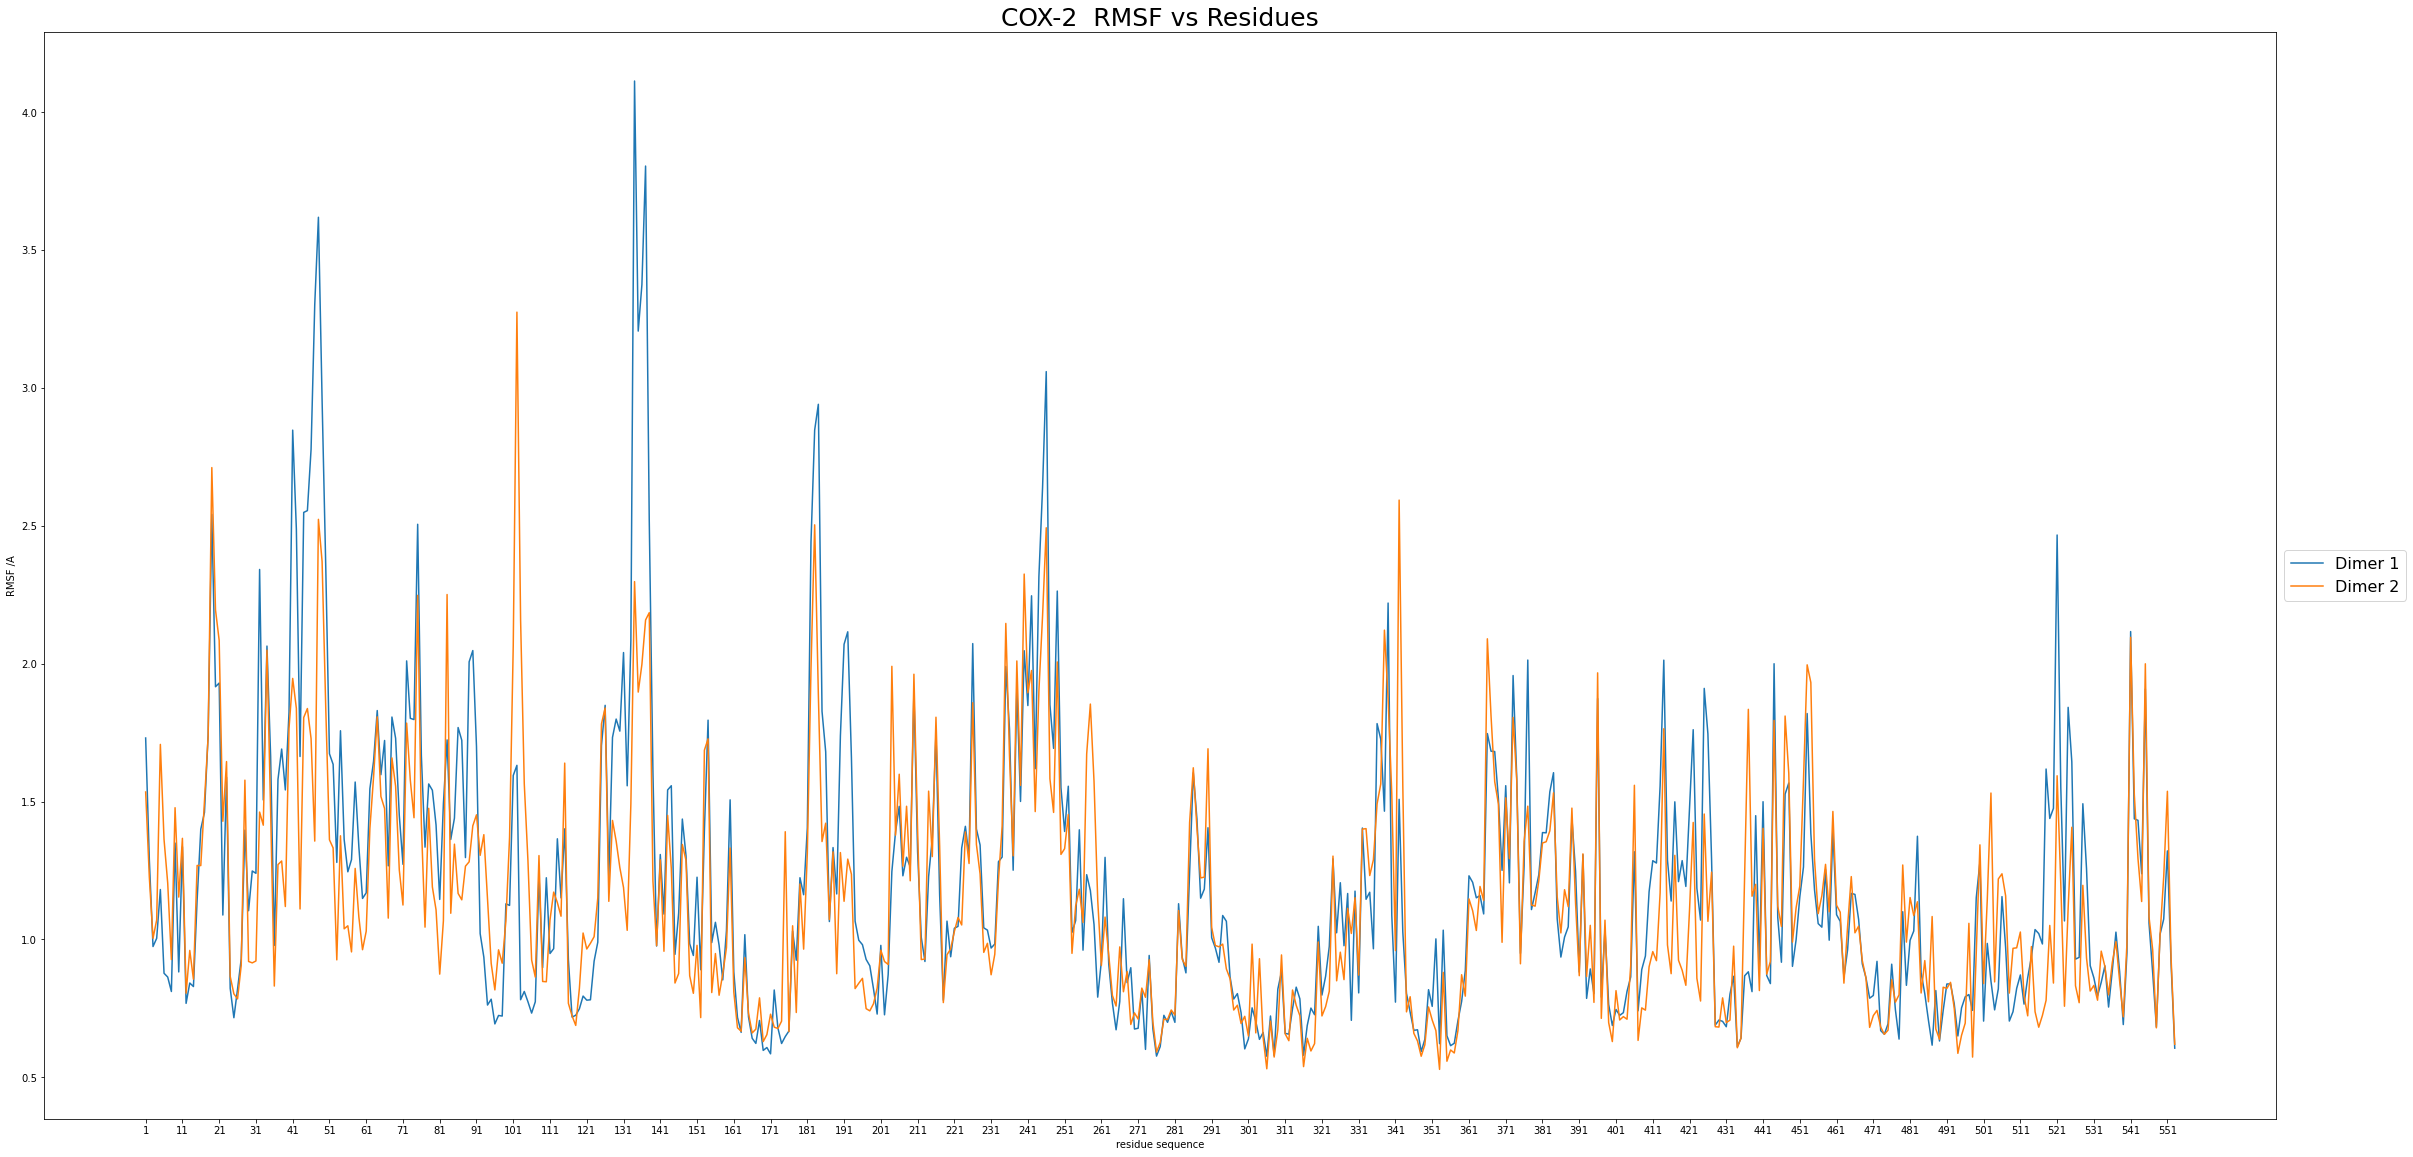

In [6]:
plt.figure(figsize = (40,20))
res_seq=np.array(range(1,554))
plt.plot(res_seq,Dimer_1.T[1],label= "Dimer 1")
plt.plot(res_seq,Dimer_2.T[1],label= "Dimer 2")
#do not visualize the head and tail residues, because they rmsf value and unlikely involves the allosteric regulation
plt.rcParams['font.size'] = '16'
plt.xticks(range(1,554,10))
plt.xlabel('residue sequence')
plt.ylabel('RMSF /A')
plt.title('COX-2  RMSF vs Residues', fontdict = {'fontsize' : 25})
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


[1.73025741 1.28924341 1.00406486 ... 1.5371082  0.93383766 0.62002399]


Text(0.5, 64.0, 'Number of residue')

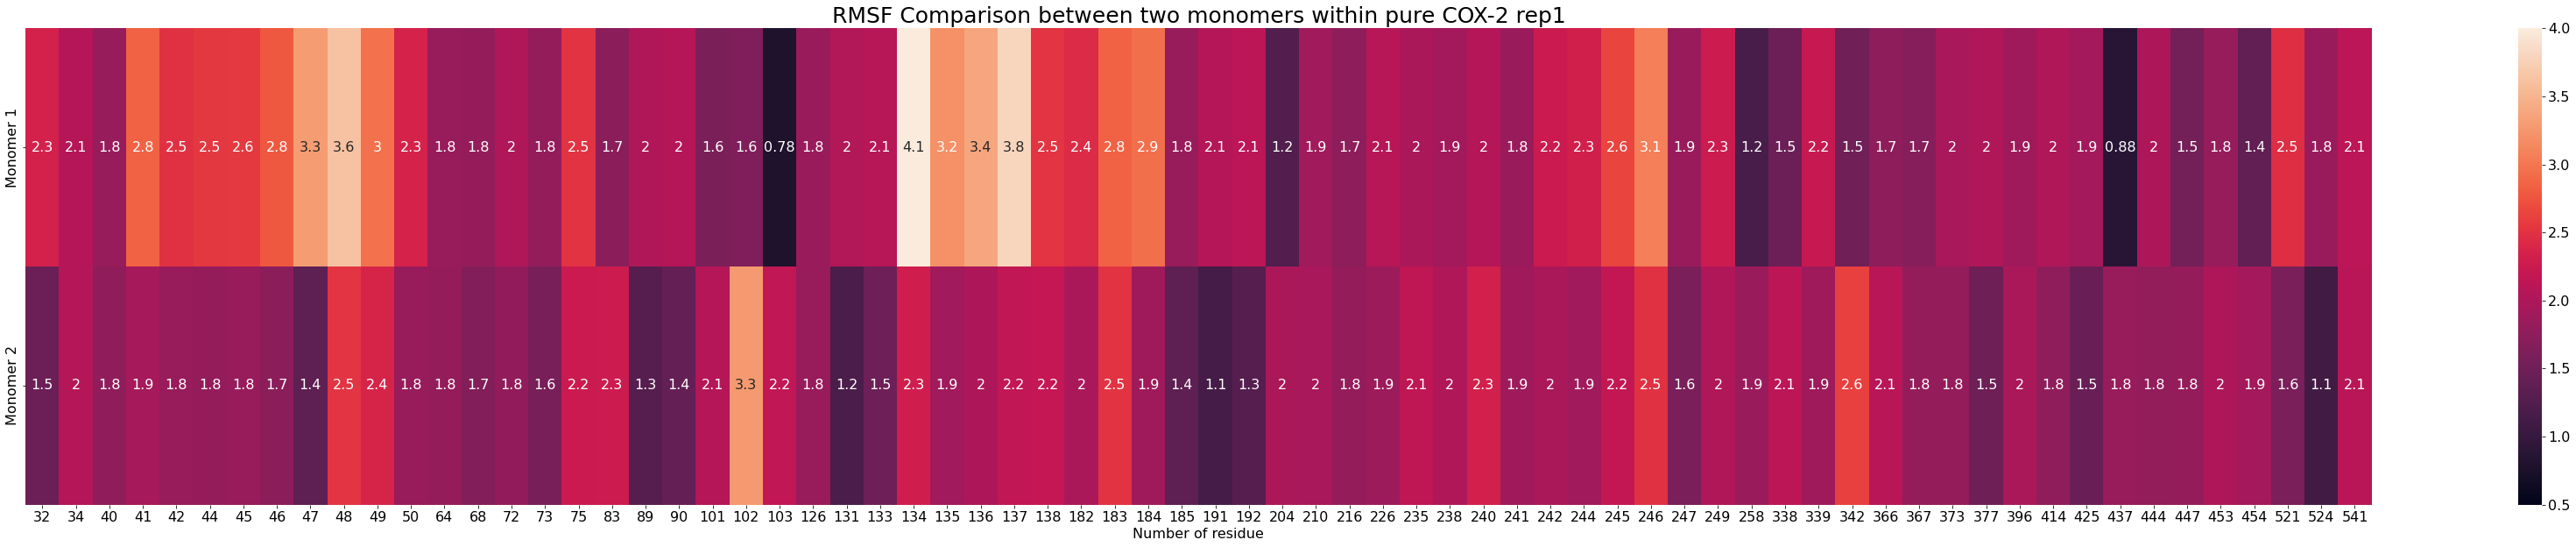

In [10]:
import pandas as pd
import seaborn as sns
sub_name=['Monomer 1','Monomer 2',]
df = pd.DataFrame(index=sub_name)
res_seq=np.array(range(1,554))
#find the max value per column, per repeating subunit
max_rmsf=np.max(rmsf_stack,axis=0)
var_rmsf=np.var(rmsf_stack,axis=0)
print(max_rmsf)
df1 = df.copy()
for res in res_seq[(var_rmsf>=0)&(max_rmsf>1.8)]:
    if int(res) > 30 and int(res) < 544:
        df1[int(res)]=rmsf_stack[:,int(res)-1]
plt.figure(figsize = (60,10))
sns.heatmap(df1,annot=True,vmax=4,vmin=0.5)
plt.title('RMSF Comparison between two monomers within pure COX-2 rep1', fontdict = {'fontsize' : 25})
plt.xlabel('Number of residue', fontdict = {'fontsize' : 16})

In [12]:

rmsd_dimer1 = pt.rmsd(traj,ref=0, mask=':1-554@CA')
rmsd_dimer2 = pt.rmsd(traj,ref=0, mask=':555-1108@CA')
print (rmsd_dimer1)
print (rmsd_dimer2)

[0.         0.82235653 0.95323919 ... 2.0461259  1.99624877 2.12310919]
[6.90104701e-07 7.86614369e-01 7.78712999e-01 ... 2.21381954e+00
 2.17405049e+00 2.17265215e+00]


6000


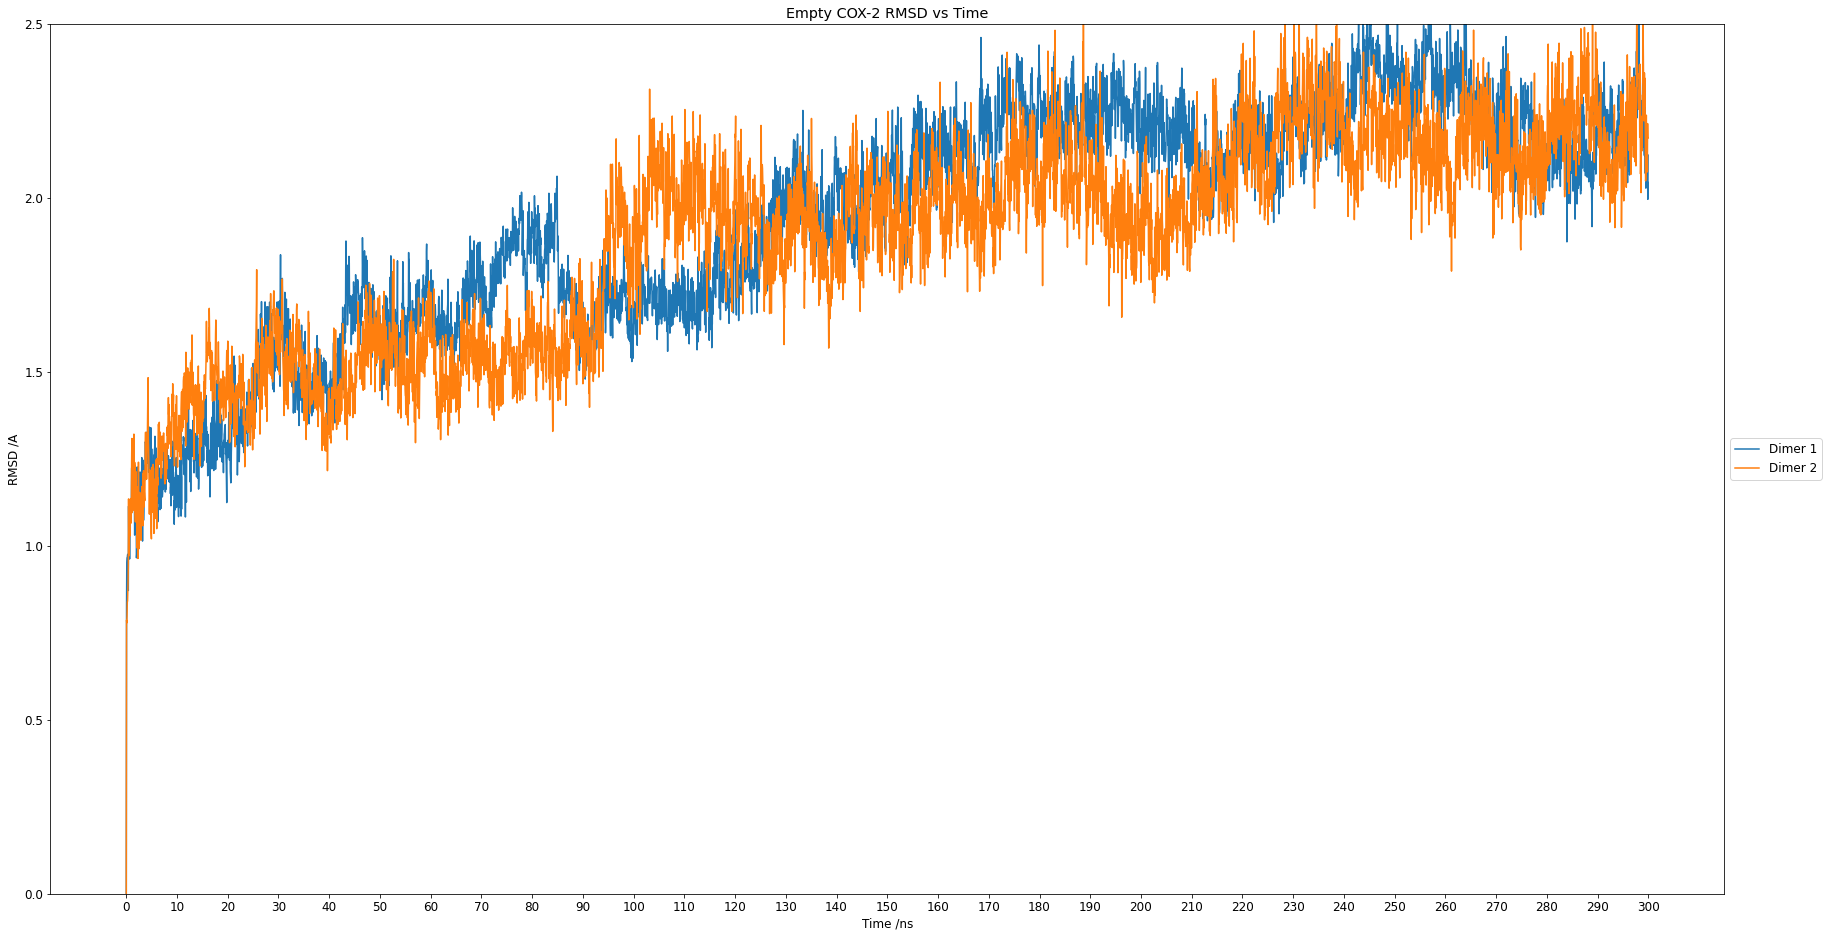

In [13]:
md_time= list(np.arange(0,300,0.05))
print (len(md_time))
plt.figure(figsize = (30,16))
plt.rcParams['font.size'] = '12'
plt.plot(md_time,rmsd_dimer1,label= "Dimer 1")
plt.plot(md_time,rmsd_dimer2,label= "Dimer 2")
plt.xticks(range(0,301,10))
plt.xlabel('Time /ns')
plt.ylabel('RMSD /A')
plt.ylim(0, 2.5)
plt.title('Empty COX-2 RMSD vs Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))